# Feature Engineering Lab Task: Titanic Dataset

**Objective:**  
Perform feature engineering on the Titanic dataset to prepare it for machine learning modeling.  
The task involves:
- Data cleaning (handling missing values, outliers)
- Feature transformation (scaling numerical features, encoding categorical features)
- Feature creation (generating new features)
- Feature selection (evaluating feature importance)

Let's begin!


# Cell 1: Import Libraries and Set Up Environment

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2

# Set plotting style
sns.set(style="whitegrid")
%matplotlib inline


## Cell 2: Load the Titanic Dataset

We use the Titanic dataset from Seaborn. This dataset is commonly used for classification tasks.


In [6]:
titanic = sns.load_dataset("titanic")
print(titanic)
print("Dataset shape:", titanic.shape)
display(titanic.head(5))

print(titanic.info())

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


## Cell 3: Data Cleaning

1. **Missing Values:** Identify columns with missing data.
2. **Outlier Detection:** (For numerical columns like 'age' and 'fare') Identify potential outliers.


Missing Values Per Column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Descriptive Statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


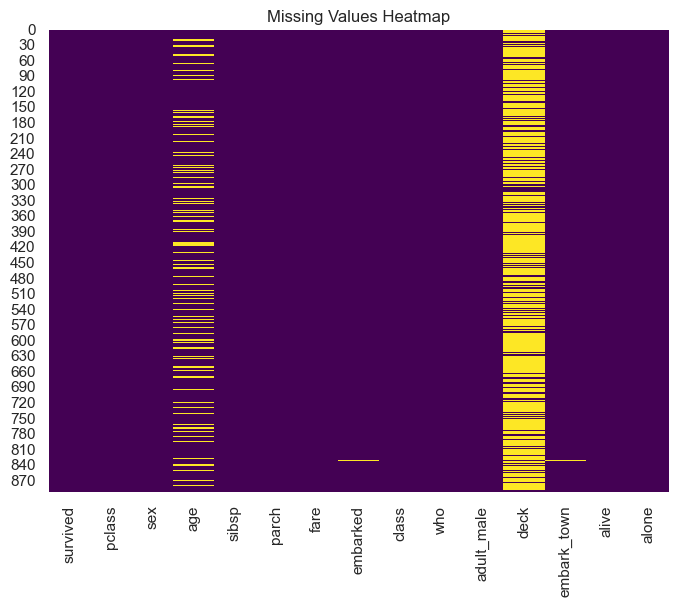

In [3]:
print("Missing Values Per Column:")
print(titanic.isnull().sum())

print("\nDescriptive Statistics:")
display(titanic.describe(include='all'))

# Visualize missing values using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


>Note: The dataset typically has no missing values.

# Cell 4: Handling Missing Values

We'll impute missing values:
- **Numerical features** ('age', 'fare'): use mean imputation.
- **Categorical features** ('embarked', 'deck'): use mode imputation.


In [7]:
# Create a copy for cleaning
titanic_clean = titanic.copy()

# Impute numerical columns with mean
titanic_clean['age'].fillna(titanic_clean['age'].mean(), inplace=True)
titanic_clean['fare'].fillna(titanic_clean['fare'].mean(), inplace=True)

# Impute categorical columns with mode
titanic_clean['embarked'].fillna(titanic_clean['embarked'].mode()[0], inplace=True)
titanic_clean['deck'].fillna(titanic_clean['deck'].mode()[0], inplace=True)

# Check missing values after imputation
print("Missing values after imputation:")
print(titanic_clean.isnull().sum())


Missing values after imputation:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64


# Cell 5: Feature Transformation

### 5.1 Scaling Numerical Features
Apply standardization to numerical features.


In [8]:
num_features = ['age', 'fare', 'sibsp', 'parch']
scaler = StandardScaler()

titanic_clean[num_features] = scaler.fit_transform(titanic_clean[num_features])
print("Numerical features after scaling:")
display(titanic_clean.head())

Numerical features after scaling:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.592481,0.432793,-0.473674,-0.502445,S,Third,man,True,C,Southampton,no,False
1,1,1,female,0.638789,0.432793,-0.473674,0.786845,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.284663,-0.474545,-0.473674,-0.488854,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,0.407926,0.432793,-0.473674,0.420730,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.407926,-0.474545,-0.473674,-0.486337,S,Third,man,True,C,Southampton,no,True


### 5.2 Encoding Categorical Features
For categorical features like 'sex', 'embarked', and 'class', apply one-hot encoding.


In [14]:
cat_features = ['sex', 'embarked', 'class']

# Using ColumnTransformer to one-hot encode categorical features and pass through the rest
# Removed the 'sparse' argument from OneHotEncoder
ct = ColumnTransformer([ ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)], remainder='passthrough')

titanic_transformed = ct.fit_transform(titanic_clean)
# Retrieve new feature names
ohe_feature_names = ct.named_transformers_['onehot'].get_feature_names_out(cat_features)
all_feature_names = list(ohe_feature_names) + [col for col in titanic_clean.columns if col not in cat_features]
titanic_transformed_df = pd.DataFrame(titanic_transformed, columns=all_feature_names)

print("DataFrame after encoding categorical features:")
display(titanic_transformed_df.head(5))

DataFrame after encoding categorical features:


,sex_male,embarked_Q,embarked_S,class_Second,class_Third,survived,pclass,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone
0,1.0,0.0,1.0,0.0,1.0,0,3,-0.592481,0.432793,-0.473674,-0.502445,man,True,C,Southampton,no,False
1,0.0,0.0,0.0,0.0,0.0,1,1,0.638789,0.432793,-0.473674,0.786845,woman,False,C,Cherbourg,yes,False
2,0.0,0.0,1.0,0.0,1.0,1,3,-0.284663,-0.474545,-0.473674,-0.488854,woman,False,C,Southampton,yes,True
3,0.0,0.0,1.0,0.0,0.0,1,1,0.407926,0.432793,-0.473674,0.42073,woman,False,C,Southampton,yes,False
4,1.0,0.0,1.0,0.0,1.0,0,3,0.407926,-0.474545,-0.473674,-0.486337,man,True,C,Southampton,no,True


## Cell 6: Feature Creation

Create new features to enhance the predictive power.  
For example, we create an "age_group" feature from the "age" column:
- **Child**: age < 18
- **Adult**: 18 ≤ age < 60
- **Senior**: age ≥ 60


In [15]:
# Cell 7: Create a New Feature: Age Group
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Since 'age' is scaled, we convert it back temporarily to original scale for grouping.
# Alternatively, we can apply categorization before scaling. Here, we'll use the original dataset.
titanic_age = titanic.copy()
titanic_age['age_group'] = titanic_age['age'].apply(lambda x: categorize_age(x) if pd.notnull(x) else np.nan)
print("New feature 'age_group':")
display(titanic_age[['age', 'age_group']].head(10))


New feature 'age_group':


,age,age_group
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,NaN
6,54.0,Adult
7,2.0,Child
8,27.0,Adult
9,14.0,Child


## Cell 7: Feature Selection

Evaluate the importance of features using correlation analysis and model-based techniques.  
We'll perform a simple correlation analysis on the numerical features.


     survived  pclass     sex       age     sibsp     parch      fare  \
0           0       3    male -0.592481  0.432793 -0.473674 -0.502445   
1           1       1  female  0.638789  0.432793 -0.473674  0.786845   
2           1       3  female -0.284663 -0.474545 -0.473674 -0.488854   
3           1       1  female  0.407926  0.432793 -0.473674  0.420730   
4           0       3    male  0.407926 -0.474545 -0.473674 -0.486337   
..        ...     ...     ...       ...       ...       ...       ...   
886         0       2    male -0.207709 -0.474545 -0.473674 -0.386671   
887         1       1  female -0.823344 -0.474545 -0.473674 -0.044381   
888         0       3  female  0.000000  0.432793  2.008933 -0.176263   
889         1       1    male -0.284663 -0.474545 -0.473674 -0.044381   
890         0       3    male  0.177063 -0.474545 -0.473674 -0.492378   

    embarked   class    who  adult_male deck  embark_town alive  alone  
0          S   Third    man        True    C  Sout

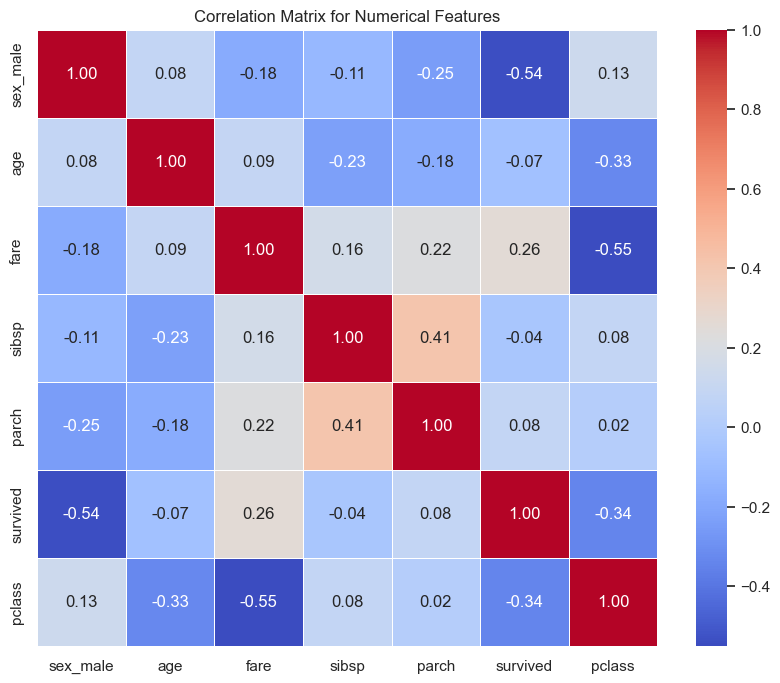

In [19]:
plt.figure(figsize=(10, 8))
print(titanic_clean)




num_features = ['sex_male', 'age', 'fare', 'sibsp', 'parch', 'survived', 'pclass']
corr_matrix = titanic_transformed_df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


## Summary and Next Steps

In this lab practice task, we:
- Selected the Titanic dataset.
- Performed data cleaning by handling missing values and visualizing them.
- Transformed numerical features through scaling and encoded categorical features using one-hot encoding.
- Created a new feature ('age_group') based on the 'age' column.
- Conducted a correlation analysis for feature selection.

These steps prepare the dataset for machine learning modeling. As a next step, consider applying a classification model (e.g., Logistic Regression, Random Forest) and evaluate its performance using the preprocessed data.

Happy coding!


Create a PCA Analyses

         PCA1      PCA2      PCA3 survived
0   -0.114923 -1.117431 -0.079588        0
1    0.213951  1.616673 -0.159207        1
2   -0.579507 -0.656618 -0.416606        1
3    0.156045  1.274212 -0.208779        1
4   -0.981219 -0.478033  0.375534        0
..        ...       ...       ...      ...
886 -0.702104 -0.153712 -0.290595        0
887 -0.157867  0.492302 -1.301873        1
888  1.455036 -0.623961  0.994213        0
889 -0.446173  0.709506 -0.815074        1
890 -0.908168 -0.598042  0.200082        0

[891 rows x 4 columns]
        sex_male  embarked_Q  embarked_S  class_Second  class_Third  survived  \
count      891.0       891.0       891.0         891.0        891.0       891   
unique       2.0         2.0         2.0           2.0          2.0         2   
top          1.0         0.0         1.0           0.0          1.0         0   
freq       577.0       814.0       646.0         707.0        491.0       549   

        pclass    age       sibsp       parch        f

<Axes: >

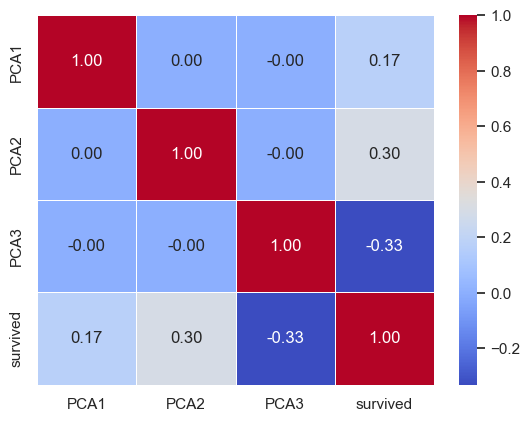

In [28]:
from sklearn.decomposition import PCA

x = titanic_transformed_df[num_features]
pca = PCA(n_components=3)
newx = pca.fit_transform(x)
newdf = pd.DataFrame(newx, columns=["PCA1", "PCA2", "PCA3"])
newdf["survived"] = titanic_transformed_df['survived']
print(newdf)

print(titanic_transformed_df.describe())

sns.heatmap(newdf.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)